<a href="https://colab.research.google.com/github/anastasiiaf/ice-cream-sales/blob/main/ice_cream_sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **EDA: ice cream sales**

In [1]:
#import libraries
import pandas as pd
import seaborn as sns

Upload csv files from GitHub via raw link to pandas dataframes.

**Checking transactions in 2018:**

In [2]:
transactions_2018 = pd.read_csv('https://raw.githubusercontent.com/anastasiiaf/ice-cream-sales/main/transactions2018.csv', sep=';')
transactions_2018.head()

,site_number,trn_transaction_date,trn_promotion_id,trn_item_number,units,gross_amount,vat,cost_price,Unnamed: 8
0,210929,2018-08-31,0,1038466,4.0,96.0,19.2,52.72,NaN
1,210870,2018-08-31,0,1036196,1.0,24.0,4.8,13.15,NaN
2,210845,2018-08-31,0,1098826,1.0,30.0,6.0,14.97,NaN
3,210929,2018-08-31,0,1098560,2.0,34.0,6.8,18.58,NaN
4,210870,2018-08-31,0,1098826,2.0,60.0,12.0,29.94,NaN


In [3]:
transactions_2018.dtypes

site_number               int64
trn_transaction_date     object
trn_promotion_id          int64
trn_item_number           int64
units                   float64
gross_amount            float64
vat                     float64
cost_price              float64
Unnamed: 8              float64
dtype: object

In [4]:
#check missing values: empty data
transactions_2018.isnull().sum()/transactions_2018.count()*100

site_number             0.0
trn_transaction_date    0.0
trn_promotion_id        0.0
trn_item_number         0.0
units                   0.0
gross_amount            0.0
vat                     0.0
cost_price              0.0
Unnamed: 8              inf
dtype: float64

In [5]:
transactions_2018.describe()

,site_number,trn_promotion_id,trn_item_number,units,gross_amount,vat,cost_price,Unnamed: 8
count,4584.000000,4584.000000,4.584000e+03,4584.000000,4584.000000,4584.000000,4584.000000,0.0
mean,210676.499127,4565.035995,1.079746e+06,3.763089,72.381981,14.476396,38.270022,NaN
std,284.664973,13923.848518,3.697163e+04,4.719464,66.251423,13.250285,36.895568,NaN
min,210240.000000,0.000000,1.036103e+06,0.000000,0.000000,0.000000,5.520000,NaN
25%,210350.000000,0.000000,1.038203e+06,1.000000,26.000000,5.200000,13.920000,NaN
50%,210845.000000,0.000000,1.098674e+06,2.000000,51.000000,10.200000,26.360000,NaN
75%,210929.000000,0.000000,1.098827e+06,4.000000,96.000000,19.200000,48.180000,NaN
max,210929.000000,47025.000000,1.136294e+06,49.000000,680.000000,136.000000,315.020000,NaN


In [6]:
# Check rows where units, gross_amount and vat is 0
transactions_2018[(transactions_2018['units']==0) | (transactions_2018['gross_amount']==0) | (transactions_2018['vat']==0)]

,site_number,trn_transaction_date,trn_promotion_id,trn_item_number,units,gross_amount,vat,cost_price,Unnamed: 8
550,210870,2018-08-20,0,1098827,0.0,0.0,0.0,32.12,NaN
797,210350,2018-08-15,0,1110359,2.0,0.0,0.0,11.86,NaN
854,210845,2018-08-14,0,1110359,1.0,0.0,0.0,5.93,NaN
884,210929,2018-08-14,0,1110359,1.0,0.0,0.0,5.93,NaN
1053,210870,2018-08-11,0,1038229,1.0,0.0,0.0,8.12,NaN
...,...,...,...,...,...,...,...,...,...
4428,210845,2018-07-02,0,1110359,1.0,0.0,0.0,5.93,NaN
4473,210350,2018-07-02,0,1038229,1.0,0.0,0.0,9.12,NaN
4505,210929,2018-07-01,0,1038229,2.0,0.0,0.0,18.24,NaN
4533,210350,2018-07-01,0,1038229,1.0,0.0,0.0,9.12,NaN


In [7]:
# drop rows with units=0 -> incomplete data or error?
# entries with units<>0 and gross_amount and vat = 0 are most likely stolen items
drop_rows = transactions_2018.index[transactions_2018['units']==0].tolist()
drop_rows

[550, 1980, 2733]

In [8]:
transactions_2018.drop(labels='Unnamed: 8', axis=1, inplace=True)
transactions_2018.drop(index=drop_rows, axis=0, inplace=True)

transactions_2018[transactions_2018['units']==0]

,site_number,trn_transaction_date,trn_promotion_id,trn_item_number,units,gross_amount,vat,cost_price


In [9]:
transactions_2018.describe()

,site_number,trn_promotion_id,trn_item_number,units,gross_amount,vat,cost_price
count,4581.000000,4581.000000,4.581000e+03,4581.000000,4581.000000,4581.000000,4581.000000
mean,210676.623445,4568.025540,1.079739e+06,3.765553,72.429382,14.485876,38.276499
std,284.629864,13927.917636,3.696909e+04,4.720026,66.247205,13.249441,36.906117
min,210240.000000,0.000000,1.036103e+06,1.000000,0.000000,0.000000,5.520000
25%,210350.000000,0.000000,1.038203e+06,1.000000,26.000000,5.200000,13.920000
50%,210845.000000,0.000000,1.098674e+06,2.000000,51.000000,10.200000,26.360000
75%,210929.000000,0.000000,1.098827e+06,4.000000,96.000000,19.200000,48.180000
max,210929.000000,47025.000000,1.136294e+06,49.000000,680.000000,136.000000,315.020000


**Checking transactions in 2017:**

In [10]:
transactions_2017 = pd.read_csv('https://raw.githubusercontent.com/anastasiiaf/ice-cream-sales/main/transactions2017.csv', sep=';')
transactions_2017.head()

,site_number,trn_transaction_date,trn_promotion_id,trn_item_number,units,gross_amount,vat,cost_price
0,210845,2017-08-31,0,1098823,1.0,26.0,5.2,12.85
1,210845,2017-08-31,0,1098678,1.0,25.0,5.0,12.41
2,210870,2017-08-31,0,1038466,3.0,72.0,14.4,36.21
3,210929,2017-08-31,0,1110346,1.0,25.0,5.0,13.06
4,210845,2017-08-31,0,1038203,1.0,12.0,2.4,5.52


In [11]:
transactions_2017.dtypes

site_number               int64
trn_transaction_date     object
trn_promotion_id          int64
trn_item_number           int64
units                   float64
gross_amount            float64
vat                     float64
cost_price              float64
dtype: object

In [12]:
#check missing values: empty data
transactions_2017.isnull().sum()/transactions_2017.count()*100

site_number             0.0
trn_transaction_date    0.0
trn_promotion_id        0.0
trn_item_number         0.0
units                   0.0
gross_amount            0.0
vat                     0.0
cost_price              0.0
dtype: float64

In [13]:
transactions_2017.describe()

,site_number,trn_promotion_id,trn_item_number,units,gross_amount,vat,cost_price
count,4556.000000,4556.0,4.556000e+03,4556.000000,4556.000000,4556.000000,4556.000000
mean,210681.889377,0.0,1.073701e+06,2.819140,56.806453,11.361291,28.372316
std,285.448490,0.0,3.229643e+04,2.687654,48.863754,9.772751,23.073563
min,210240.000000,0.0,1.036103e+06,0.000000,0.000000,0.000000,5.520000
25%,210350.000000,0.0,1.036903e+06,1.000000,25.000000,5.000000,12.850000
50%,210845.000000,0.0,1.098674e+06,2.000000,40.000000,8.000000,21.260000
75%,210929.000000,0.0,1.098824e+06,4.000000,72.000000,14.400000,37.800000
max,210929.000000,0.0,1.113841e+06,73.000000,730.000000,146.000000,320.060000


In [14]:
# Check again rows where units, gross_amount and vat is 0
transactions_2017[(transactions_2017['units']==0) | (transactions_2017['gross_amount']==0) | (transactions_2017['vat']==0)]

,site_number,trn_transaction_date,trn_promotion_id,trn_item_number,units,gross_amount,vat,cost_price
7,210845,2017-08-31,0,1038229,1.0,0.0,0.0,7.56
47,210870,2017-08-31,0,1038229,1.0,0.0,0.0,7.56
115,210240,2017-08-29,0,1038229,2.0,0.0,0.0,15.12
197,210870,2017-08-28,0,1038229,2.0,0.0,0.0,15.12
231,210350,2017-08-28,0,1038229,1.0,0.0,0.0,7.56
...,...,...,...,...,...,...,...,...
4297,210870,2017-07-04,0,1038229,1.0,0.0,0.0,8.56
4348,210350,2017-07-03,0,1038229,4.0,0.0,0.0,34.24
4358,210240,2017-07-03,0,1038229,2.0,0.0,0.0,17.12
4391,210929,2017-07-03,0,1038229,1.0,0.0,0.0,8.56


In [15]:
# drop rows with units=0 -> incomplete data or error?
# entries with units<>0 and gross_amount and vat = 0 are most likely stolen items
drop_rows = transactions_2017.index[transactions_2017['units']==0].tolist()
drop_rows

[2288]

In [16]:
transactions_2017.drop(index=drop_rows, axis=0, inplace=True)

transactions_2017[transactions_2017['units']==0]

,site_number,trn_transaction_date,trn_promotion_id,trn_item_number,units,gross_amount,vat,cost_price


In [17]:
transactions_2017.describe()

,site_number,trn_promotion_id,trn_item_number,units,gross_amount,vat,cost_price
count,4555.000000,4555.0,4.555000e+03,4555.000000,4555.000000,4555.000000,4555.000000
mean,210681.853568,0.0,1.073709e+06,2.819759,56.818924,11.363785,28.363704
std,285.469594,0.0,3.229530e+04,2.687624,48.861866,9.772373,23.068772
min,210240.000000,0.0,1.036103e+06,1.000000,0.000000,0.000000,5.520000
25%,210350.000000,0.0,1.036903e+06,1.000000,25.000000,5.000000,12.850000
50%,210845.000000,0.0,1.098674e+06,2.000000,40.000000,8.000000,21.260000
75%,210929.000000,0.0,1.098824e+06,4.000000,72.000000,14.400000,37.800000
max,210929.000000,0.0,1.113841e+06,73.000000,730.000000,146.000000,320.060000


**Merge transaction datasets to one**

In [18]:
transactions = transactions_2018.append(transactions_2017, ignore_index=True)
transactions.head()

,site_number,trn_transaction_date,trn_promotion_id,trn_item_number,units,gross_amount,vat,cost_price
0,210929,2018-08-31,0,1038466,4.0,96.0,19.2,52.72
1,210870,2018-08-31,0,1036196,1.0,24.0,4.8,13.15
2,210845,2018-08-31,0,1098826,1.0,30.0,6.0,14.97
3,210929,2018-08-31,0,1098560,2.0,34.0,6.8,18.58
4,210870,2018-08-31,0,1098826,2.0,60.0,12.0,29.94


In [19]:
transactions.tail()

,site_number,trn_transaction_date,trn_promotion_id,trn_item_number,units,gross_amount,vat,cost_price
9131,210350,2017-07-01,0,1098560,2.0,34.0,6.8,17.44
9132,210929,2017-07-01,0,1098817,5.0,85.0,17.0,40.20
9133,210929,2017-07-01,0,1098677,1.0,36.0,7.2,19.07
9134,210240,2017-07-01,0,1098825,3.0,90.0,18.0,41.97
9135,210845,2017-07-01,0,1098674,3.0,75.0,15.0,39.18


In [20]:
transactions.describe()

,site_number,trn_promotion_id,trn_item_number,units,gross_amount,vat,cost_price
count,9136.000000,9136.000000,9.136000e+03,9136.000000,9136.000000,9136.000000,9136.000000
mean,210679.231064,2290.512806,1.076733e+06,3.294002,64.646366,12.929273,33.334206
std,285.045238,10123.049568,3.484639e+04,3.872267,58.749399,11.749880,31.189110
min,210240.000000,0.000000,1.036103e+06,1.000000,0.000000,0.000000,5.520000
25%,210350.000000,0.000000,1.038203e+06,1.000000,26.000000,5.200000,13.150000
50%,210845.000000,0.000000,1.098674e+06,2.000000,50.000000,10.000000,24.620000
75%,210929.000000,0.000000,1.098826e+06,4.000000,85.000000,17.000000,40.637500
max,210929.000000,47025.000000,1.136294e+06,73.000000,730.000000,146.000000,320.060000


In [21]:
transactions['price_per_item']=transactions['gross_amount']/transactions['units']
transactions['vat_per_item']=transactions['vat']/transactions['units']
transactions['cost_per_item']=transactions['cost_price']/transactions['units']
transactions['profit']=transactions['gross_amount']-transactions['vat']-transactions['cost_price']
transactions['profit_per_item']=transactions['profit']/transactions['units']

In [22]:
# convert data in transaction date column to Datetime
transactions['trn_transaction_date'] = pd.DatetimeIndex(transactions['trn_transaction_date'])
year_ = transactions.trn_transaction_date.dt.year
month_ = transactions.trn_transaction_date.dt.month
day_of_week_ = transactions.trn_transaction_date.dt.day_of_week
day_name_ = transactions.trn_transaction_date.dt.day_name
transactions['year'] = year_
transactions['month'] = month_
transactions['day_of_week'] = day_of_week_

In [23]:
transactions.groupby(['year', 'month', 'site_number'])['gross_amount','cost_price', 'profit'].sum()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


gross_amount  cost_price    profit
year month site_number                                    
2017 7     210240            16653.2     7687.24   5635.32
           210350            20585.4     9001.86   7466.46
           210845            23555.8    11084.96   7759.68
           210870            24885.2    11955.20   7952.96
           210929            48981.5    23737.48  15447.72
     8     210240            21291.8    11243.89   5789.55
           210350            14004.5     7330.43   3873.17
           210845            24839.2    13142.56   6728.80
           210870            27384.0    14473.49   7433.71
           210929            36629.6    19539.56   9764.12
2018 7     210240            24920.8    12870.11   7066.53
           210350            38177.0    18604.61  11936.99
           210845            36439.7    18023.51  11128.25
           210870            39812.9    21022.81  10827.51
           210929            70493.6    38516.60  17878.28
     8     210240            19308.8    10946.08   4500.96
           210350            17396.5     8639.08   5278.12
           210845            26065.4    13838.13   7014.19
           210870            25739.3    13905.27   6686.17
           210929            33445.0    18978.44   7777.56

In [24]:
# sorted total sales
transactions.groupby(['year', 'month', 'site_number'])['gross_amount','cost_price', 'profit'].sum().sort_values(by=['year', 'month', 'gross_amount'], ascending=False)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


gross_amount  cost_price    profit
year month site_number                                    
2018 8     210929            33445.0    18978.44   7777.56
           210845            26065.4    13838.13   7014.19
           210870            25739.3    13905.27   6686.17
           210240            19308.8    10946.08   4500.96
           210350            17396.5     8639.08   5278.12
     7     210929            70493.6    38516.60  17878.28
           210870            39812.9    21022.81  10827.51
           210350            38177.0    18604.61  11936.99
           210845            36439.7    18023.51  11128.25
           210240            24920.8    12870.11   7066.53
2017 8     210929            36629.6    19539.56   9764.12
           210870            27384.0    14473.49   7433.71
           210845            24839.2    13142.56   6728.80
           210240            21291.8    11243.89   5789.55
           210350            14004.5     7330.43   3873.17
     7     210929            48981.5    23737.48  15447.72
           210870            24885.2    11955.20   7952.96
           210845            23555.8    11084.96   7759.68
           210350            20585.4     9001.86   7466.46
           210240            16653.2     7687.24   5635.32

In [25]:
# sorted total cost
transactions.groupby(['year', 'month', 'site_number'])['gross_amount','cost_price', 'profit'].sum().sort_values(by=['year', 'month', 'cost_price'], ascending=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


gross_amount  cost_price    profit
year month site_number                                    
2017 7     210240            16653.2     7687.24   5635.32
           210350            20585.4     9001.86   7466.46
           210845            23555.8    11084.96   7759.68
           210870            24885.2    11955.20   7952.96
           210929            48981.5    23737.48  15447.72
     8     210350            14004.5     7330.43   3873.17
           210240            21291.8    11243.89   5789.55
           210845            24839.2    13142.56   6728.80
           210870            27384.0    14473.49   7433.71
           210929            36629.6    19539.56   9764.12
2018 7     210240            24920.8    12870.11   7066.53
           210845            36439.7    18023.51  11128.25
           210350            38177.0    18604.61  11936.99
           210870            39812.9    21022.81  10827.51
           210929            70493.6    38516.60  17878.28
     8     210350            17396.5     8639.08   5278.12
           210240            19308.8    10946.08   4500.96
           210845            26065.4    13838.13   7014.19
           210870            25739.3    13905.27   6686.17
           210929            33445.0    18978.44   7777.56

In [26]:
# sorted total profit
transactions.groupby(['year', 'month', 'site_number'])['gross_amount','cost_price', 'profit'].sum().sort_values(by=['year', 'month', 'profit'], ascending=False)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


gross_amount  cost_price    profit
year month site_number                                    
2018 8     210929            33445.0    18978.44   7777.56
           210845            26065.4    13838.13   7014.19
           210870            25739.3    13905.27   6686.17
           210350            17396.5     8639.08   5278.12
           210240            19308.8    10946.08   4500.96
     7     210929            70493.6    38516.60  17878.28
           210350            38177.0    18604.61  11936.99
           210845            36439.7    18023.51  11128.25
           210870            39812.9    21022.81  10827.51
           210240            24920.8    12870.11   7066.53
2017 8     210929            36629.6    19539.56   9764.12
           210870            27384.0    14473.49   7433.71
           210845            24839.2    13142.56   6728.80
           210240            21291.8    11243.89   5789.55
           210350            14004.5     7330.43   3873.17
     7     210929            48981.5    23737.48  15447.72
           210870            24885.2    11955.20   7952.96
           210845            23555.8    11084.96   7759.68
           210350            20585.4     9001.86   7466.46
           210240            16653.2     7687.24   5635.32

In [27]:
# sorted average price per item
transactions.groupby(['year', 'month', 'site_number'])['price_per_item','cost_per_item', 'profit_per_item'].mean().sort_values(by=['year', 'month', 'price_per_item'], ascending=False)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


price_per_item  cost_per_item  profit_per_item
year month site_number                                                
2018 8     210870            26.042769      13.575355         7.258860
           210240            22.835410      12.167809         6.100519
           210929            22.741650      12.372747         5.820573
           210845            22.655228      11.833962         6.290220
           210350            22.607616      11.377927         6.708165
     7     210929            22.810613      12.090413         6.158077
           210870            22.639884      11.918645         6.193263
           210845            22.370991      11.405078         6.491715
           210240            21.617865      11.295723         5.998569
           210350            21.568968      10.970435         6.284739
2017 8     210929            21.119708      11.095779         5.799987
           210870            20.672198      10.845786         5.691973
           210845            20.095916      10.658497         5.418236
           210240            20.018267      10.619785         5.394828
           210350            19.780164      10.354198         5.469932
     7     210870            23.016132      11.333204         7.079701
           210350            22.906265      10.834193         7.490819
           210929            22.677019      11.211243         6.930372
           210845            22.388738      11.187381         6.723609
           210240            22.326055      10.915360         6.945483

In [28]:
# sorted average cost per item
transactions.groupby(['year', 'month', 'site_number'])['price_per_item','cost_per_item', 'profit_per_item'].mean().sort_values(by=['year', 'month', 'cost_per_item'], ascending=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


price_per_item  cost_per_item  profit_per_item
year month site_number                                                
2017 7     210350            22.906265      10.834193         7.490819
           210240            22.326055      10.915360         6.945483
           210845            22.388738      11.187381         6.723609
           210929            22.677019      11.211243         6.930372
           210870            23.016132      11.333204         7.079701
     8     210350            19.780164      10.354198         5.469932
           210240            20.018267      10.619785         5.394828
           210845            20.095916      10.658497         5.418236
           210870            20.672198      10.845786         5.691973
           210929            21.119708      11.095779         5.799987
2018 7     210350            21.568968      10.970435         6.284739
           210240            21.617865      11.295723         5.998569
           210845            22.370991      11.405078         6.491715
           210870            22.639884      11.918645         6.193263
           210929            22.810613      12.090413         6.158077
     8     210350            22.607616      11.377927         6.708165
           210845            22.655228      11.833962         6.290220
           210240            22.835410      12.167809         6.100519
           210929            22.741650      12.372747         5.820573
           210870            26.042769      13.575355         7.258860

In [29]:
# sorted average price per item
transactions.groupby(['year', 'month', 'site_number'])['price_per_item','cost_per_item', 'profit_per_item'].mean().sort_values(by=['year', 'month', 'profit_per_item'], ascending=False)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


price_per_item  cost_per_item  profit_per_item
year month site_number                                                
2018 8     210870            26.042769      13.575355         7.258860
           210350            22.607616      11.377927         6.708165
           210845            22.655228      11.833962         6.290220
           210240            22.835410      12.167809         6.100519
           210929            22.741650      12.372747         5.820573
     7     210845            22.370991      11.405078         6.491715
           210350            21.568968      10.970435         6.284739
           210870            22.639884      11.918645         6.193263
           210929            22.810613      12.090413         6.158077
           210240            21.617865      11.295723         5.998569
2017 8     210929            21.119708      11.095779         5.799987
           210870            20.672198      10.845786         5.691973
           210350            19.780164      10.354198         5.469932
           210845            20.095916      10.658497         5.418236
           210240            20.018267      10.619785         5.394828
     7     210350            22.906265      10.834193         7.490819
           210870            23.016132      11.333204         7.079701
           210240            22.326055      10.915360         6.945483
           210929            22.677019      11.211243         6.930372
           210845            22.388738      11.187381         6.723609

In [30]:
#grouped = transactions.groupby([year_, month_, 'site_number'])['gross_amount','cost_price', 'profit'].sum()
#grouped = grouped.reset_index(level=0).rename(columns={'trn_transaction_date':'year'})
#grouped = grouped.reset_index(level=0).rename(columns={'trn_transaction_date':'month'})
#grouped = grouped.reset_index()
#grouped

In [31]:
transactions.groupby(['year', 'month', 'day_of_week', 'site_number'])['gross_amount','cost_price', 'profit'].sum().sort_values(by=['year', 'month', 'day_of_week', 'profit'], ascending=False)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


gross_amount  cost_price   profit
year month day_of_week site_number                                   
2018 8     6           210929             3834.0     2258.78   808.42
                       210845             2381.2     1231.57   673.39
                       210870             2165.0     1122.43   609.57
                       210240             2036.0     1222.76   406.04
                       210350             1403.8      721.86   401.18
...                                          ...         ...      ...
2017 7     0           210929             7446.0     3702.77  2254.03
                       210845             3532.3     1697.88  1127.96
                       210240             2939.0     1414.83   936.37
                       210870             2442.4     1190.43   763.49
                       210350             2140.0     1041.24   670.76

[140 rows x 3 columns]

In [32]:
# units sold
transactions.groupby(['year', 'month','site_number'])['units'].count()

year  month  site_number
2017  7      210240         403
             210350         407
             210845         478
             210870         405
             210929         644
      8      210240         427
             210350         326
             210845         453
             210870         464
             210929         548
2018  7      210240         459
             210350         565
             210845         555
             210870         519
             210929         669
      8      210240         305
             210350         302
             210845         373
             210870         325
             210929         509
Name: units, dtype: int64

In [33]:
transactions[transactions['year']==2018]['units'].value_counts()

1.0     1572
2.0      991
3.0      580
4.0      398
5.0      245
6.0      190
7.0      111
9.0       78
8.0       74
10.0      53
15.0      32
11.0      26
13.0      25
12.0      24
14.0      19
17.0      17
20.0      17
16.0      16
18.0      15
23.0      14
21.0      12
19.0      11
25.0       8
24.0       7
32.0       6
29.0       5
33.0       4
30.0       4
22.0       4
27.0       4
34.0       3
35.0       3
26.0       3
38.0       2
49.0       2
31.0       2
37.0       1
40.0       1
28.0       1
36.0       1
Name: units, dtype: int64

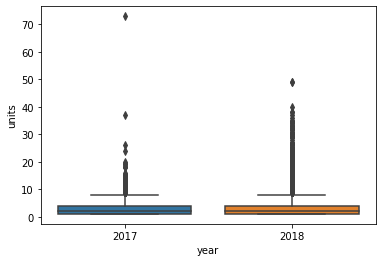

In [34]:
sns.boxplot(x="year", y="units", data=transactions)

In [35]:
transactions[transactions['year']==2017]['units'].value_counts()

1.0     1731
2.0     1031
3.0      628
4.0      391
5.0      263
6.0      162
7.0      108
8.0       77
9.0       44
10.0      36
11.0      28
12.0      19
14.0      12
13.0       9
15.0       4
18.0       3
19.0       3
16.0       1
73.0       1
37.0       1
20.0       1
24.0       1
26.0       1
Name: units, dtype: int64

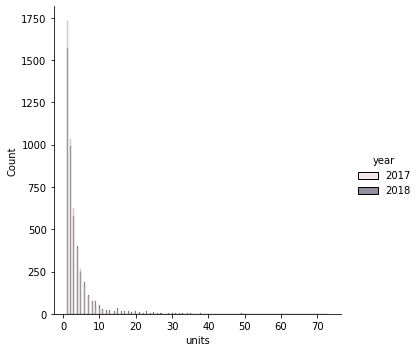

In [36]:
sns.displot(transactions, x="units", hue="year")

In [37]:
transactions['site_number'].unique()

array([210929, 210870, 210845, 210350, 210240])

In [38]:
transactions['trn_promotion_id'].unique()

array([    0, 47025])

In [39]:
transactions['trn_item_number'].unique()

array([1038466, 1036196, 1098826, 1098560, 1098677, 1098824, 1036103,
       1038229, 1036623, 1136294, 1098827, 1131992, 1038625, 1036903,
       1131990, 1098674, 1098825, 1131991, 1131989, 1132788, 1110347,
       1110359, 1115099, 1098678, 1038203, 1036513, 1098823, 1098822,
       1134792, 1110348, 1110349, 1113841, 1110358, 1098676, 1110346,
       1098817, 1036567, 1098819])

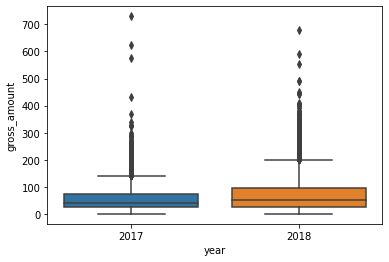

In [40]:
sns.boxplot(x="year", y="gross_amount", data=transactions)

In [41]:
transactions_2018['vat%']=transactions_2018['vat']/transactions_2018['gross_amount']*100
transactions_2018['vat%'].value_counts()

20.0    4311
20.0      98
20.0      57
20.0       3
20.0       1
Name: vat%, dtype: int64

In [42]:
transactions[transactions['trn_promotion_id']==47025]

,site_number,trn_transaction_date,trn_promotion_id,trn_item_number,units,gross_amount,vat,cost_price,price_per_item,vat_per_item,cost_per_item,profit,profit_per_item,year,month,day_of_week
448,210929,2018-08-21,47025,1038229,1.0,10.0,2.0,8.12,10.0,2.0,8.120000,-0.12,-0.120000,2018,8,1
451,210240,2018-08-21,47025,1038229,9.0,90.0,18.0,8.12,10.0,2.0,0.902222,63.88,7.097778,2018,8,1
463,210240,2018-08-21,47025,1136294,2.0,20.0,4.0,16.58,10.0,2.0,8.290000,-0.58,-0.290000,2018,8,1
468,210240,2018-08-21,47025,1098560,11.0,110.0,22.0,8.29,10.0,2.0,0.753636,79.71,7.246364,2018,8,1
483,210929,2018-08-21,47025,1036103,1.0,10.0,2.0,8.15,10.0,2.0,8.150000,-0.15,-0.150000,2018,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2528,210240,2018-07-24,47025,1036513,9.0,90.0,18.0,57.47,10.0,2.0,6.385556,14.53,1.614444,2018,7,1
2529,210870,2018-07-24,47025,1036903,10.0,100.0,20.0,81.00,10.0,2.0,8.100000,-1.00,-0.100000,2018,7,1
2535,210845,2018-07-24,47025,1098560,10.0,100.0,20.0,82.90,10.0,2.0,8.290000,-2.90,-0.290000,2018,7,1
2544,210350,2018-07-24,47025,1098560,11.0,110.0,22.0,74.61,10.0,2.0,6.782727,13.39,1.217273,2018,7,1


In [43]:
# dates for promoactions
transactions[transactions['trn_promotion_id']==47025].groupby(['year', 'month'])['trn_transaction_date'].agg({'min','max'})


min        max
year month                      
2018 7     2018-07-24 2018-07-31
     8     2018-08-01 2018-08-21

In [44]:
transactions_promo = transactions[transactions['trn_promotion_id']==47025]
transactions_promo.groupby(['year', 'month', 'trn_item_number'])['units','gross_amount','cost_price', 'profit'].sum().sort_values(by=['year', 'month', 'profit'], ascending=False)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


units  gross_amount  cost_price   profit
year month trn_item_number                                          
2018 8     1098560          992.0        9920.0     6855.83  1080.17
           1036513          659.0        6590.0     4334.88   937.12
           1038229          649.0        6490.0     4604.04   587.96
           1036903          184.0        1840.0     1215.00   257.00
           1036103          224.0        2240.0     1572.95   219.05
           1136294          140.0        1400.0     1011.38   108.62
           1038625           24.0         240.0      200.64    -8.64
     7     1036903          730.0        7300.0     4681.80  1158.20
           1036103          585.0        5850.0     3586.00  1094.00
           1038229          506.0        5060.0     3459.12   588.88
           1036513          520.0        5200.0     3751.97   408.03
           1098560          488.0        4880.0     3697.34   206.66

In [45]:
transactions_nopromo = transactions[transactions['trn_promotion_id']==0]
transactions_nopromo.groupby(['year', 'month', 'trn_item_number'])['units', 'gross_amount','cost_price', 'profit'].sum().sort_values(by=['year', 'month', 'profit'], ascending=False)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


units  gross_amount  cost_price   profit
year month trn_item_number                                          
2018 8     1036196          456.0       10929.6     5720.25  3023.43
           1098677          259.0        9527.5     4895.00  2727.00
           1038466          381.0        9124.8     4692.08  2607.76
           1036623          238.0        8047.8     4083.73  2354.51
           1098826          221.0        6630.0     3098.79  2205.21
...                           ...           ...         ...      ...
2017 7     1038203          118.0        1412.4      618.24   511.68
           1110347           34.0         680.0      350.79   193.21
           1098676            6.0         150.0       78.00    42.00
           1113841            3.0          51.0       25.95    14.85
           1098819            1.0          24.0       11.92     7.28

[117 rows x 4 columns]

In [46]:
transactions_promo.groupby(['year', 'month', 'site_number'])['price_per_item','cost_per_item', 'profit_per_item'].mean().sort_values(by=['year', 'month', 'profit_per_item'], ascending=False)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


price_per_item  cost_per_item  profit_per_item
year month site_number                                                
2018 8     210845                 10.0       6.792755         1.207245
           210350                 10.0       6.996597         1.003403
           210240                 10.0       7.206354         0.793646
           210870                 10.0       7.427230         0.572770
           210929                 10.0       8.190899        -0.190899
     7     210845                 10.0       6.253869         1.746131
           210240                 10.0       6.650355         1.349645
           210870                 10.0       7.249644         0.750356
           210350                 10.0       7.363850         0.636150
           210929                 10.0       8.176333        -0.176333

In [47]:
transactions_promo.groupby(['year', 'month', 'trn_item_number'])['price_per_item','cost_per_item', 'profit_per_item'].mean().sort_values(by=['year', 'month', 'profit_per_item'], ascending=False)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


price_per_item  cost_per_item  profit_per_item
year month trn_item_number                                                
2018 8     1036903                    10.0       6.991879         1.008121
           1036513                    10.0       7.104678         0.895322
           1038229                    10.0       7.380241         0.619759
           1098560                    10.0       7.391880         0.608120
           1036103                    10.0       7.603143         0.396857
           1136294                    10.0       7.780129         0.219871
           1038625                    10.0       8.360000        -0.360000
     7     1036903                    10.0       6.649297         1.350703
           1036103                    10.0       6.667574         1.332426
           1038229                    10.0       7.137897         0.862103
           1036513                    10.0       7.326309         0.673691
           1098560                    10.0       7.691177         0.308823

In [48]:
transactions.groupby(['year', 'month', 'trn_item_number'])['price_per_item','cost_per_item', 'profit_per_item'].mean().sort_values(by=['year', 'month', 'profit_per_item'], ascending=False)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


price_per_item  cost_per_item  profit_per_item
year month trn_item_number                                                
2018 8     1098677               36.600980      19.128892        10.151892
           1098827               31.736986      15.671333         9.718256
           1098826               30.000000      14.504899         9.495101
           1110348               32.000000      16.150000         9.450000
           1036623               33.570874      17.477663         9.379036
...                                    ...            ...              ...
2017 7     1038625               17.000000       8.387629         5.212371
           1113841               17.000000       8.650000         4.950000
           1038229               15.295198       8.005115         4.231043
           1038203               11.942857       5.444329         4.109957
           1110359                8.527273       5.748057         1.073761

[117 rows x 3 columns]

In [49]:
transactions.corr()

,site_number,trn_promotion_id,trn_item_number,units,gross_amount,vat,cost_price,price_per_item,vat_per_item,cost_per_item,profit,profit_per_item,year,month,day_of_week
site_number,1.000000,-0.035928,0.028332,0.080288,0.146596,0.146596,0.160689,0.039905,0.039905,0.064571,0.083982,0.002208,-0.009175,0.017922,0.001971
trn_promotion_id,-0.035928,1.000000,-0.087662,0.556179,0.244459,0.244459,0.393544,-0.326925,-0.326925,-0.231076,-0.035092,-0.319826,0.225636,0.083571,-0.000635
trn_item_number,0.028332,-0.087662,1.000000,-0.245398,-0.126222,-0.126222,-0.165235,0.356239,0.356239,0.302828,-0.034824,0.296817,0.086531,0.005738,-0.002948
units,0.080288,0.556179,-0.245398,1.000000,0.801192,0.801192,0.828997,-0.252457,-0.252457,-0.269885,0.527620,-0.154360,0.122130,0.012843,0.000378
gross_amount,0.146596,0.244459,-0.126222,0.801192,1.000000,1.000000,0.914657,0.176376,0.176376,0.068690,0.825958,0.229239,0.132863,-0.054597,-0.003071
vat,0.146596,0.244459,-0.126222,0.801192,1.000000,1.000000,0.914657,0.176376,0.176376,0.068690,0.825958,0.229239,0.132863,-0.054597,-0.003071
cost_price,0.160689,0.393544,-0.165235,0.828997,0.914657,0.914657,1.000000,0.059198,0.059198,0.105805,0.527589,-0.006870,0.158922,-0.016727,-0.005434
price_per_item,0.039905,-0.326925,0.356239,-0.252457,0.176376,0.176376,0.059198,1.000000,1.000000,0.843879,0.288100,0.839468,0.065664,-0.042460,-0.013624
vat_per_item,0.039905,-0.326925,0.356239,-0.252457,0.176376,0.176376,0.059198,1.000000,1.000000,0.843879,0.288100,0.839468,0.065664,-0.042460,-0.013624
cost_per_item,0.064571,-0.231076,0.302828,-0.269885,0.068690,0.068690,0.105805,0.843879,0.843879,1.000000,-0.003200,0.416852,0.113137,0.010483,-0.021181


In [50]:
#transactions.to_csv('transactions.csv')